# Pymaceuticals Inc.
---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Examining the data to understand the variables and datatypes
mouse_metadata.info()
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [3]:
# Checking the number of mice.
mouse_results_df["Mouse ID"].nunique() 

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_results_df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False).head(10)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
a203      0            1
q633      0            1
q610      20           1
          25           1
          30           1
dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = mouse_results_df["Mouse ID"] == "g989"
mouse_results_df.loc[mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Professor's HW review helped me with this
mask = mouse_results_df["Mouse ID"] != "g989"
mouse_results_clean_df = mouse_results_df.loc[mask].reset_index(drop=True)
mouse_results_clean_df.shape

(1880, 8)

In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean_df["Mouse ID"].nunique() 

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = mouse_results_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = mouse_results_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_variance = mouse_results_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = mouse_results_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = mouse_results_clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

tumor_data = {
    "Tumor Average": tumor_mean,
    "Tumor Median": tumor_median,
    "Tumor Variance": tumor_variance,
    "Tumor STD": tumor_std,
    "Tumor SEM": tumor_sem
}

tumor_volume = pd.DataFrame(tumor_data).reset_index()
tumor_volume


,Drug Regimen,Tumor Average,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

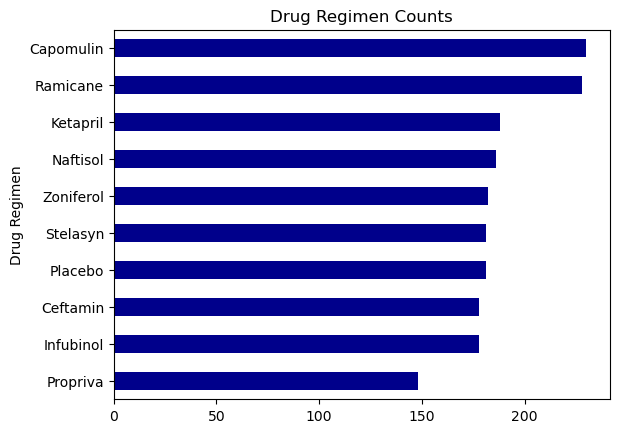

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_results_clean_df["Drug Regimen"].value_counts().sort_values().plot(kind="barh", title="Drug Regimen Counts", color="darkblue")
plt.show()

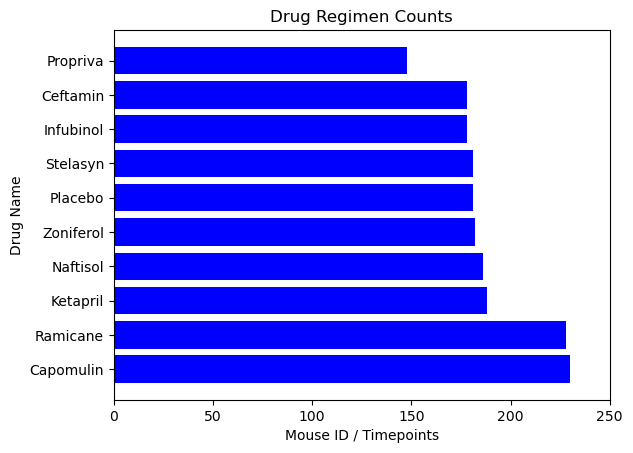

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_data = mouse_results_clean_df["Drug Regimen"].value_counts()
drug_name = list(drug_data.index)
mouse_dosage = list(drug_data.values)

plt.barh(drug_name, mouse_dosage, color="b", align="center")
plt.xlim(0, 250)

plt.title("Drug Regimen Counts")
plt.xlabel("Mouse ID / Timepoints")
plt.ylabel("Drug Name")

plt.show()

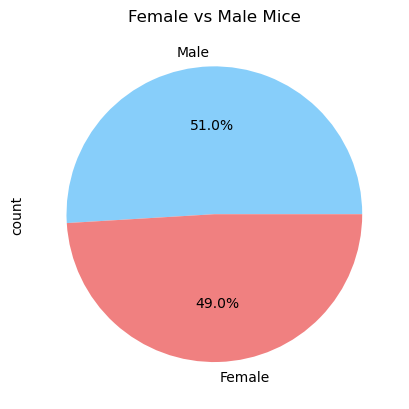

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Male", "Female"]
colors = ["lightskyblue","lightcoral"]
mouse_results_clean_df["Sex"].value_counts().plot(kind="pie", y='Sex', labels=labels, 
                                                  autopct='%1.1f%%', colors=colors, title="Female vs Male Mice")
plt.show()

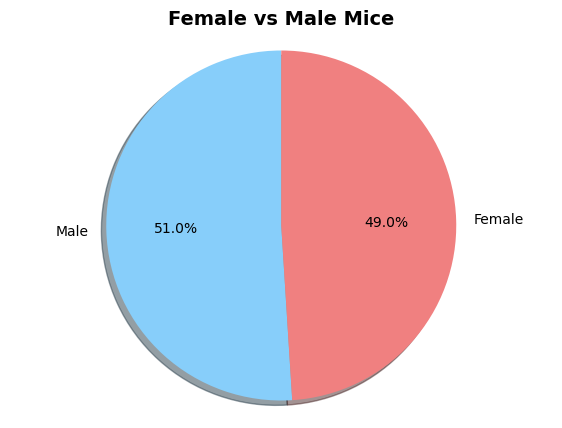

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Step 1: Define values
gender = ["Male", "Female"]
gender_count = [51,49]
colors = ["lightskyblue","lightcoral"]

# Step 2: Make the canvas
plt.figure(figsize=(7, 5))

# Step 3: Make the plot
plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Step 4: Customizations
plt.title("Female vs Male Mice", fontweight="bold", fontsize=14)
plt.axis("equal")

# Step 5: Save/Show
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Xpert helped me with this
last_timepoint_df = mouse_results_clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(last_timepoint_df, mouse_results_clean_df, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Office hours helped me with this
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
# Loop through each treatment in the treatment list 
for treatment in treatment_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(treatment_data)
    
    # Calculate quartiles and IQR for the current treatment
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Calculate lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Identify potential outliers in the tumor volume data for the current treatment
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print the results
    print(f'({treatment} potential outliers: {outliers})')
   

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


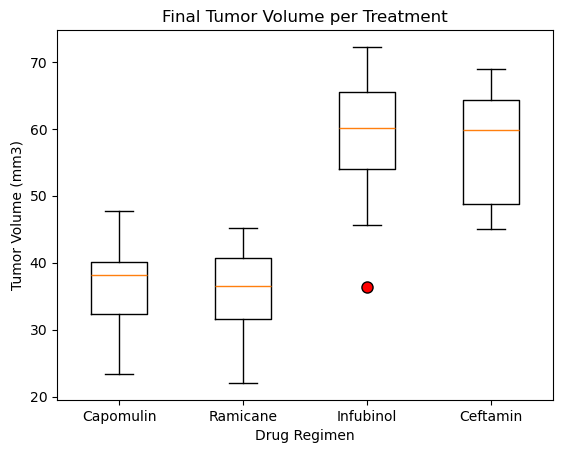

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
labels = treatment_names
plt.boxplot(tumor_vol_list, labels=labels, flierprops=dict(marker='o', markerfacecolor='red', markersize=8)) 
plt.title("Final Tumor Volume per Treatment")
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

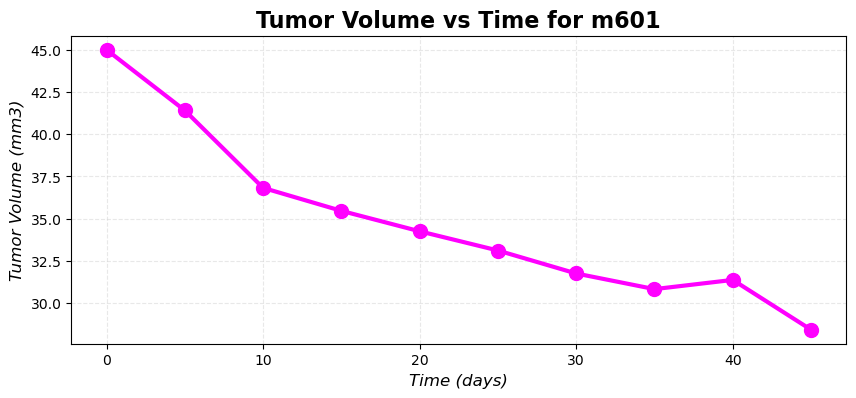

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_results_clean_df.loc[mouse_results_clean_df["Drug Regimen"] == "Capomulin"]
mouse = "m601"
data = mouse_results_clean_df.loc[mouse_results_clean_df["Mouse ID"] == mouse]

# Step 1: Get the data
time = data["Timepoint"]
tumor = data["Tumor Volume (mm3)"]

# Step 2: Initialize the canvas
plt.figure(figsize=(10, 4))

# Step 3: Set up the framework
plt.plot(time, tumor, color="magenta", linewidth=3, marker="o", markersize=10)

# Step 4: Customize the graph
plt.xlabel("Time (days)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title(f"Tumor Volume vs Time for {mouse}", fontsize=16, fontweight="bold")
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show the graph
plt.show()

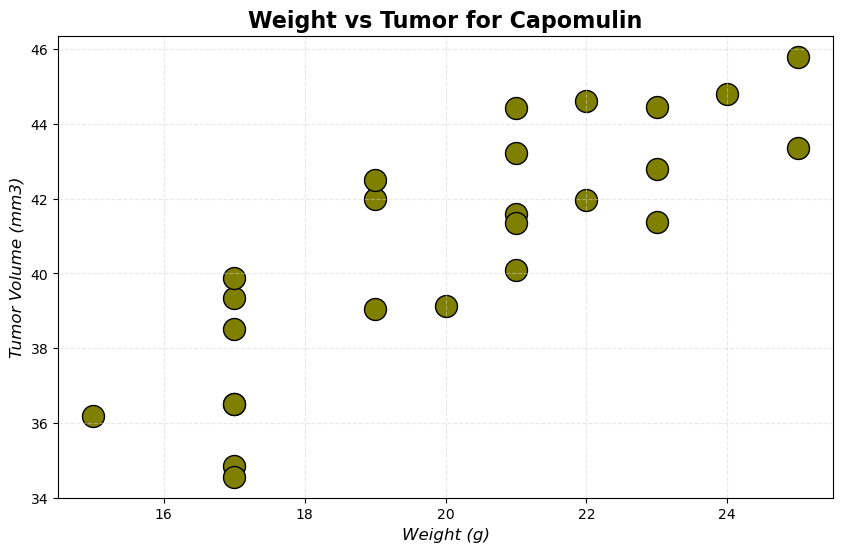

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Professor's HW review helped me with this
data = mouse_results_clean_df.loc[mouse_results_clean_df["Drug Regimen"] == "Capomulin"]
weight_volume_df = data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()

# Step 1: Get the data
x = weight_volume_df["Weight (g)"]
y = weight_volume_df["Tumor Volume (mm3)"]

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Set up the framework
plt.scatter(x, y, facecolor="olive", edgecolor="black", s=250)

# Step 4: Customizations
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show the graph
plt.show()

## Correlation and Regression

In [19]:
# Dependencies and Setup
# Professor's HW review helped me with this
from scipy.stats import linregress

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corrs = weight_volume_df.corr(numeric_only = True)
corrs

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


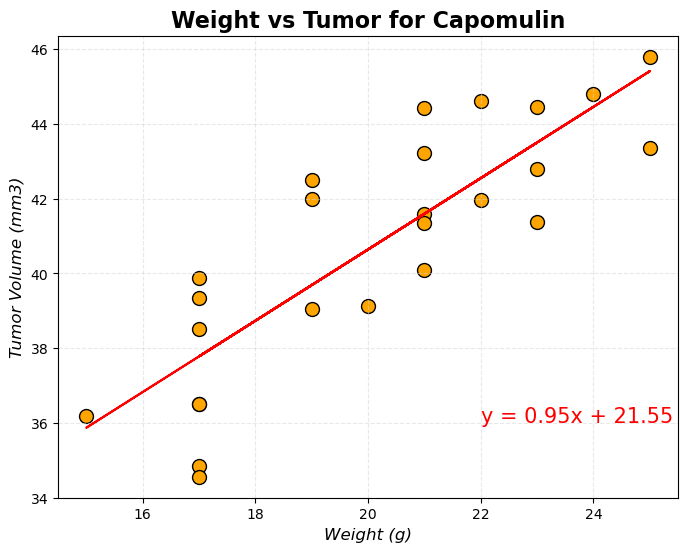

In [21]:
# Step 1: Gather the data
x_values = weight_volume_df["Weight (g)"]
y_values = weight_volume_df["Tumor Volume (mm3)"]

# Create the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
# Calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="orange", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit

# Step 4: Customize
plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Tumor for Capomulin", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="red")

# Step 5: Display the visual 
print(f"The r-squared is: {rvalue**2}")
plt.show()